# Simulating an AP protocol with "data clamp"

In this notebook we will look at implementing an action potential (AP) protocol from a CSV file using the "data clamp" method.

The protocol used was introduced in ["Sinusoidal voltage protocols for rapid characterisation of ion channel kinetics"](https://doi.org/10.1113/JP275733), where it was used for _validation:_
models were trained using a sine wave protocol, but model performance was then evaluated by comparing the models' predictions during an AP (the context where it matters most).

We start by loading the AP waveform from a CSV file, using the [load_csv](https://myokit.readthedocs.io/en/stable/api_simulations/DataLog.html#myokit.DataLog.load_csv) method from the `DataLog` class:

In [2]:
import matplotlib.pyplot as plt
import myokit
import numpy as np

# Load a CSV file
log_1 = myokit.DataLog.load_csv('resources/ap.csv')

# Inspect its contents
print(log_1.keys())

odict_keys(['time', 'voltage'])


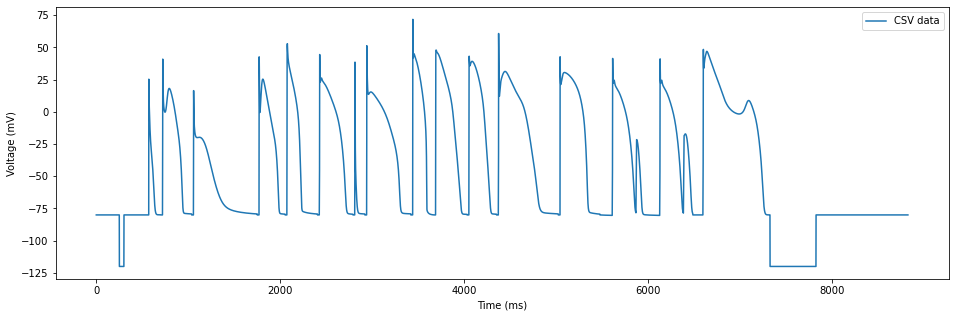

In [3]:
# Convert Python lists to NumPy arrays
log_1 = log_1.npview()

# Extract times and voltages
times = log_1['time']
voltages = log_1['voltage']

# Show the protocol
plt.figure(figsize=(16, 5))
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.plot(times, voltages, label='CSV data')
plt.legend()
plt.show()

Now, we use the data we loaded in a simulation, instead of using a `myokit.Protocol` in a simulation, and we compare the simulated voltage to the voltage in the CSV file.

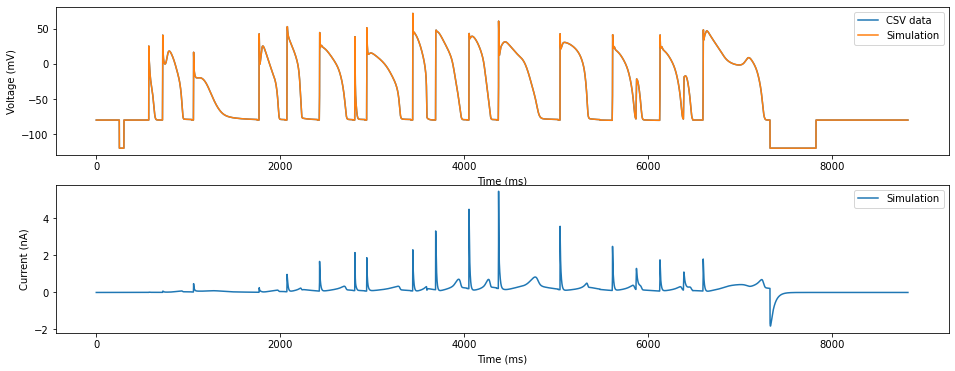

In [4]:
# Load a model
model = myokit.load_model('resources/beattie-2017-ikr-hh.mmt')

# Create a simulation (without a protocol)
sim = myokit.Simulation(model)

# Add the protocol
sim.set_fixed_form_protocol(times, voltages)

# Run a simulation
tmax = log_1['time'][-1] + 1
log_2 = sim.run(tmax, log_times=times)

plt.figure(figsize=(16, 6))

plt.subplot(2, 1, 1)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.plot(times, voltages, label='CSV data')
plt.plot(log_2['engine.time'], log_2['membrane.V'], label='Simulation')
plt.legend()

plt.subplot(2, 1, 2)
plt.xlabel('Time (ms)')
plt.ylabel('Current (nA)')
plt.plot(log_2['engine.time'], log_2['ikr.IKr'], label='Simulation')
plt.legend()

plt.show()

## Summary

In this notebook we have

- Seen how to use `set_fixed_form_protocol` to use a CSV file as a voltage protocol.

In the next notebook, we'll take another look at simulating simple step protocols.